In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
df1= pd.read_excel("data_2017-2020_02072020.xlsx", sheet_name= "working")# merged all 3 sheets in excel of stackline data in one sheet and named it "working"; reading sheet named "working"

In [4]:
df1.info()#column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36936 entries, 0 to 36935
Data columns (total 33 columns):
PK                        36936 non-null object
RetailerName              36936 non-null object
WeekId                    36936 non-null int64
WeekEnding                36936 non-null datetime64[ns]
StacklineSku              36936 non-null object
RetailerSku               36936 non-null object
Title                     36936 non-null object
Brand                     36936 non-null object
Category                  36936 non-null object
SubCategory               36936 non-null object
ModelNumber               28077 non-null object
RetailPrice               36936 non-null float64
RetailSales               36936 non-null float64
WholesaleSales            36936 non-null float64
UnitsSold                 36936 non-null int64
UnitsOnHand               36936 non-null int64
RetailerMargin            36936 non-null float64
WeeksOnHand               36930 non-null float64
InventoryStatus  

In [5]:
df1.columns

Index(['PK', 'RetailerName', 'WeekId', 'WeekEnding', 'StacklineSku',
       'RetailerSku', 'Title', 'Brand', 'Category', 'SubCategory',
       'ModelNumber', 'RetailPrice', 'RetailSales', 'WholesaleSales',
       'UnitsSold', 'UnitsOnHand', 'RetailerMargin', 'WeeksOnHand',
       'InventoryStatus', 'IsActive', 'InStock', 'BrandCOGS', 'UnitsReturned',
       'Returns - Retail Value', 'Return Rate %', 'MAP Price',
       'MAP Price Violations', 'AvailabilityStatus', 'AvailabilityStatusCode',
       'BuyBox(Win%)', 'Review Star', 'IsVerified', 'ReviewText'],
      dtype='object')

In [6]:
keep_col= ['PK', 'WeekEnding', 'StacklineSku',
       'RetailerSku', 'Category', 'SubCategory',
       'RetailPrice', 'WholesaleSales',
       'UnitsSold', 'UnitsOnHand', 'WeeksOnHand',
       'IsActive', 'InStock', 'BrandCOGS', 'Return Rate %', 'AvailabilityStatus', 'AvailabilityStatusCode',
       'BuyBox(Win%)', 'Review Star', 'IsVerified', 'ReviewText']

In [41]:
df_working= df1[['PK', 'WeekEnding', 'StacklineSku',
       'RetailerSku', 'Category', 'SubCategory',
       'RetailPrice', 'WholesaleSales',
       'UnitsSold', 'UnitsOnHand', 'WeeksOnHand',
       'IsActive', 'InStock', 'BrandCOGS', 'Return Rate %', 'AvailabilityStatus', 'AvailabilityStatusCode',
       'BuyBox(Win%)', 'Review Star', 'IsVerified', 'ReviewText']]#keeping relevant columns 

# <font color = 'blue'>  Sentiment Analysis** </font>

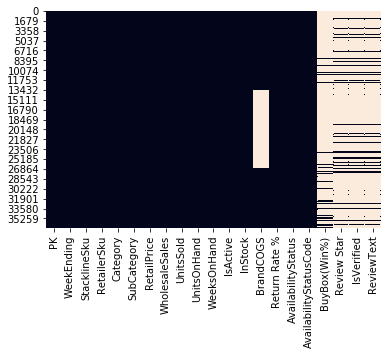

In [9]:
sns.heatmap(df_working.isnull(), cbar=False)#EDA of null values for each column

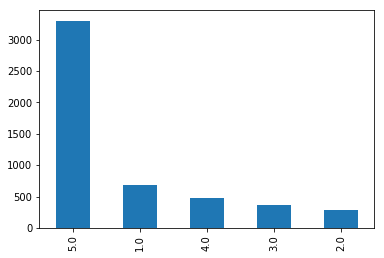

In [10]:
	
df_working['Review Star'].value_counts().plot(kind='bar')#EDA of customer review rating

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #importing Sentiment Analysis Package 
analyser = SentimentIntensityAnalyzer()

In [12]:
def sentiment_analyzer_scores(sentence):#making a function to extract sentiment score
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [46]:
sentiment_score= []
sentiment=[]

In [47]:
for i in range(0,len(df_working)):#storing sentiment of each review
    try:
        text=df_working.loc[i,'ReviewText']
        #print(text)
        value= sentiment_analyzer_scores(text)
        sentiment_score.append(value)
        #print (sentiment_score)
        if value > 0.5:
            sentiment.append("Positive")
        elif value < -0.5:
            sentiment.append("Negative")
        else: 
            sentiment.append("Neutral")
            
    except:
        sentiment_score.append("No Review")
        sentiment.append("No")
        continue

In [48]:
sentiment_score

['No Review',
 'No Review',
 'No Review',
 'No Review',
 0.8481,
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 0.784,
 'No Review',
 'No Review',
 0.7115,
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 -0.6956,
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 0.7902,
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 0.6249,
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 0.8442,
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',

In [49]:
sentiment

['No Review',
 'No Review',
 'No Review',
 'No Review',
 'Positive',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'Positive',
 'No Review',
 'No Review',
 'Positive',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'Negative',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'Positive',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'Positive',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'Positive',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',
 'No Review',

In [50]:
df_working["sentiment_score"]= sentiment_score #adding new column of sentiment score in current data frame
df_working["sentiment_category"]= sentiment #adding new column of positive, negative and neutral sentiment in current dataframe

C:\Users\shive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shive\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


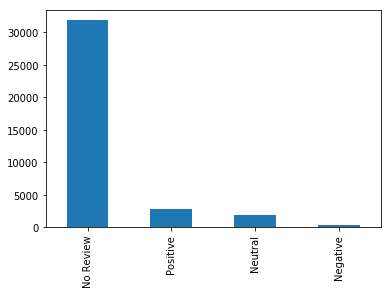

In [52]:
df_working['sentiment_category'].value_counts().plot(kind='bar')#bar graph of sentiments

In [53]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36936 entries, 0 to 36935
Data columns (total 23 columns):
PK                        36936 non-null object
WeekEnding                36936 non-null datetime64[ns]
StacklineSku              36936 non-null object
RetailerSku               36936 non-null object
Category                  36936 non-null object
SubCategory               36936 non-null object
RetailPrice               36936 non-null float64
WholesaleSales            36936 non-null float64
UnitsSold                 36936 non-null int64
UnitsOnHand               36936 non-null int64
WeeksOnHand               36930 non-null float64
IsActive                  36936 non-null int64
InStock                   36936 non-null float64
BrandCOGS                 23635 non-null float64
Return Rate %             36936 non-null float64
AvailabilityStatus        36936 non-null object
AvailabilityStatusCode    36936 non-null object
BuyBox(Win%)              4757 non-null float64
Review Star     

In [57]:
df_working.to_csv("sentiment_score.csv") #saving updated dataframe into csv file which includes sentiment score and sentiment category

# <font color = 'blue'>  LSTM Time Series** </font>

In [4]:
df_ts= df1[["WeekId","WeekEnding", "RetailerSku", "UnitsSold"]]#creating new dataframe with relevant column for LSTM

In [6]:
# ************************* HIDDEN FOR CONFIDENTIALITY *************************
df_ts= df_ts[df_ts["RetailerSku"]== "******"] #doing LSTM for a random ASIN

In [7]:
df_ts= df_ts.sort_values(by= ["WeekId"]) #sorting values as per weekid

In [9]:
df_ts["WeekId"]= df_ts["WeekId"].astype(str) #dropping 2020 value as we are considering full 3 year data to include trend and seasonality
ind_drop = df_ts[df_ts['WeekId'].apply(lambda x: x.startswith('2020'))].index 
df_ts = df_ts.drop(ind_drop)

df_ts["WeekId"]= df_ts["WeekId"].astype(int)
df_ts= df_ts.reset_index()
df_ts['WeekEnding'] = pd.to_datetime(df_ts['WeekEnding'])

In [11]:
y= df_ts["UnitsSold"] # defining y variable
x= df_ts["WeekEnding"] # defining x variable

C:\Users\shive\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


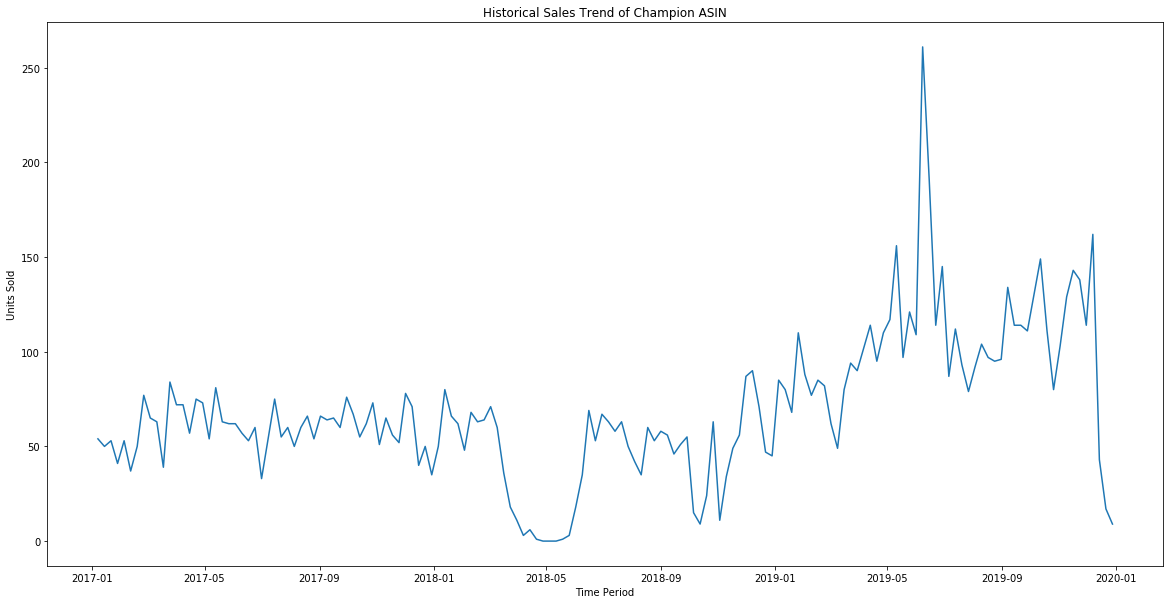

In [12]:
plt.figure(figsize=(20,10)) #plotting time series graph of selected ASIN
plt.plot(x, y)
plt.title("Historical Sales Trend of Champion ASIN")
plt.xlabel("Time Period")
plt.ylabel("Units Sold")
plt.show()

In [13]:
import numpy
numpy.random.seed(10)

In [14]:
y_value = y.values
y_value = y_value.astype('float64')

In [15]:
y_value

array([ 54.,  50.,  53.,  41.,  53.,  37.,  50.,  77.,  65.,  63.,  39.,
        84.,  72.,  72.,  57.,  75.,  73.,  54.,  81.,  63.,  62.,  62.,
        57.,  53.,  60.,  33.,  54.,  75.,  55.,  60.,  50.,  60.,  66.,
        54.,  66.,  64.,  65.,  60.,  76.,  67.,  55.,  62.,  73.,  51.,
        65.,  56.,  52.,  78.,  71.,  40.,  50.,  35.,  50.,  80.,  66.,
        62.,  48.,  68.,  63.,  64.,  71.,  60.,  36.,  18.,  11.,   3.,
         6.,   1.,   0.,   0.,   0.,   1.,   3.,  18.,  35.,  69.,  53.,
        67.,  63.,  58.,  63.,  50.,  42.,  35.,  60.,  53.,  58.,  56.,
        46.,  51.,  55.,  15.,   9.,  24.,  63.,  11.,  34.,  49.,  56.,
        87.,  90.,  71.,  47.,  45.,  85.,  80.,  68., 110.,  88.,  77.,
        85.,  82.,  62.,  49.,  80.,  94.,  90., 102., 114.,  95., 110.,
       117., 156.,  97., 121., 109., 261., 191., 114., 145.,  87., 112.,
        93.,  79.,  92., 104.,  97.,  95.,  96., 134., 114., 114., 111.,
       130., 149., 111.,  80., 103., 129., 143., 13

In [17]:
# normalize the dataset
y_value= y_value.reshape((-1,1))
y_value

array([[ 54.],
       [ 50.],
       [ 53.],
       [ 41.],
       [ 53.],
       [ 37.],
       [ 50.],
       [ 77.],
       [ 65.],
       [ 63.],
       [ 39.],
       [ 84.],
       [ 72.],
       [ 72.],
       [ 57.],
       [ 75.],
       [ 73.],
       [ 54.],
       [ 81.],
       [ 63.],
       [ 62.],
       [ 62.],
       [ 57.],
       [ 53.],
       [ 60.],
       [ 33.],
       [ 54.],
       [ 75.],
       [ 55.],
       [ 60.],
       [ 50.],
       [ 60.],
       [ 66.],
       [ 54.],
       [ 66.],
       [ 64.],
       [ 65.],
       [ 60.],
       [ 76.],
       [ 67.],
       [ 55.],
       [ 62.],
       [ 73.],
       [ 51.],
       [ 65.],
       [ 56.],
       [ 52.],
       [ 78.],
       [ 71.],
       [ 40.],
       [ 50.],
       [ 35.],
       [ 50.],
       [ 80.],
       [ 66.],
       [ 62.],
       [ 48.],
       [ 68.],
       [ 63.],
       [ 64.],
       [ 71.],
       [ 60.],
       [ 36.],
       [ 18.],
       [ 11.],
       [  3.],
       [  

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Min max scaling
y_value = scaler.fit_transform(y_value)

In [19]:
y_value

array([[0.20689655],
       [0.19157088],
       [0.20306513],
       [0.15708812],
       [0.20306513],
       [0.14176245],
       [0.19157088],
       [0.29501916],
       [0.24904215],
       [0.24137931],
       [0.14942529],
       [0.32183908],
       [0.27586207],
       [0.27586207],
       [0.2183908 ],
       [0.28735632],
       [0.27969349],
       [0.20689655],
       [0.31034483],
       [0.24137931],
       [0.23754789],
       [0.23754789],
       [0.2183908 ],
       [0.20306513],
       [0.22988506],
       [0.12643678],
       [0.20689655],
       [0.28735632],
       [0.21072797],
       [0.22988506],
       [0.19157088],
       [0.22988506],
       [0.25287356],
       [0.20689655],
       [0.25287356],
       [0.24521073],
       [0.24904215],
       [0.22988506],
       [0.29118774],
       [0.25670498],
       [0.21072797],
       [0.23754789],
       [0.27969349],
       [0.1954023 ],
       [0.24904215],
       [0.21455939],
       [0.19923372],
       [0.298

In [20]:
# split into train and test sets
train_size = int(len(y_value) * 0.67)
test_size = len(y_value) - train_size
train, test = y_value[0:train_size,:], y_value[train_size:len(y_value),:]
print(len(train), len(test))

104 52


In [21]:
train[:5]

array([[0.20689655],
       [0.19157088],
       [0.20306513],
       [0.15708812],
       [0.20306513]])

In [22]:
def create_dataset(y_value, look_back=1): #defining function to transform dataset in LSTM format
    dataX, dataY = [], []
    for i in range(len(y_value)-look_back-1):
        a = y_value[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(y_value[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
trainX[:5]

array([[0.20689655],
       [0.19157088],
       [0.20306513],
       [0.15708812],
       [0.20306513]])

In [25]:
testX.shape[0]

50

In [26]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
# create and fit the LSTM network
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dropout(0.05)) # dropout regularization
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0249
Epoch 2/100
 - 0s - loss: 0.0072
Epoch 3/100
 - 0s - loss: 0.0058
Epoch 4/100
 - 0s - loss: 0.0058
Epoch 5/100
 - 0s - loss: 0.0059
Epoch 6/100
 - 0s - loss: 0.0054
Epoch 7/100
 - 0s - loss: 0.0051
Epoch 8/100
 - 0s - loss: 0.0055
Epoch 9/100
 - 0s - loss: 0.0059
Epoch 10/100
 - 0s - loss: 0.0048
Epoch 11/100
 - 0s - loss: 0.0051
Epoch 12/100
 - 0s - loss: 0.0051
Epoch 13/100
 - 0s - loss: 0.0050
Epoch 14/100
 - 0s - loss: 0.0049
Epoch 15/100
 - 0s - loss: 0.0048
Epoch 16/100
 - 0s - loss: 0.0045
Epoch 17/100
 - 0s - loss: 0.0043
Epoch 18/100
 - 0s - loss: 0.0045
Epoch 19/100
 - 0s - loss: 0.0042
Epoch 20/100
 - 0s - loss: 0.0047
Epoch 21/100
 - 0s - loss: 0.0039
Epoch 22/100
 - 0s - loss: 0.0040
Epoch 23/100
 - 0s - loss: 0.0043
Epoch 24/100
 - 0s - loss: 0.0044
Epoch 25/100
 - 0s - loss: 0.0041
Epoch 26/100
 - 0s - loss: 0.0038
Epoch 27/100
 - 0s - loss: 0.0043
Epoch 28/100
 - 0s - loss: 0.0040
Epoch 29/100
 - 0s - loss: 0.0041
Epoch 30/100
 - 0s - lo

In [28]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [29]:
testPredict[:5]

array([[0.28640103],
       [0.27320498],
       [0.24154387],
       [0.35213944],
       [0.29431546]], dtype=float32)

In [30]:
testPredict_inverted = scaler.inverse_transform(testPredict) #inverse transforming test predicted value
testPredict_inverted[:5]

array([[74.75067 ],
       [71.3065  ],
       [63.04295 ],
       [91.908394],
       [76.81634 ]], dtype=float32)

In [31]:
len(testPredict_inverted)

50

In [32]:
trainPredict_inverted = scaler.inverse_transform(trainPredict) #inverse transforming train predicted value
trainPredict_inverted[:5]

array([[53.433086],
       [50.698658],
       [52.7489  ],
       [44.57198 ],
       [52.7489  ]], dtype=float32)

In [32]:
len(trainPredict_inverted)

102

In [33]:
trainY_inverted= scaler.inverse_transform([trainY])
testY_inverted= scaler.inverse_transform([testY])

In [34]:
testY_inverted

array([[ 80.,  68., 110.,  88.,  77.,  85.,  82.,  62.,  49.,  80.,  94.,
         90., 102., 114.,  95., 110., 117., 156.,  97., 121., 109., 261.,
        191., 114., 145.,  87., 112.,  93.,  79.,  92., 104.,  97.,  95.,
         96., 134., 114., 114., 111., 130., 149., 111.,  80., 103., 129.,
        143., 138., 114., 162.,  43.,  17.]])

In [35]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverted[0], trainPredict_inverted[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_inverted[0], testPredict_inverted[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.32 RMSE
Test Score: 38.13 RMSE


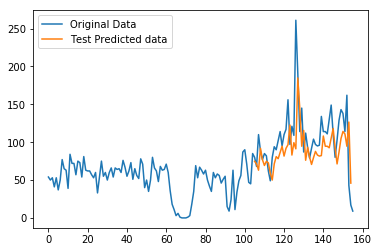

In [36]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(y_value)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict_inverted)+look_back, :] = trainPredict_inverted
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y_value)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict_inverted)+(look_back*2)+1:len(y_value)-1, :] = testPredict_inverted
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y_value), label= "Original Data")
#plt.plot(trainPredictPlot, label= "Train Predicted data")
plt.plot(testPredictPlot, label= "Test Predicted data")
plt.legend()
plt.show()

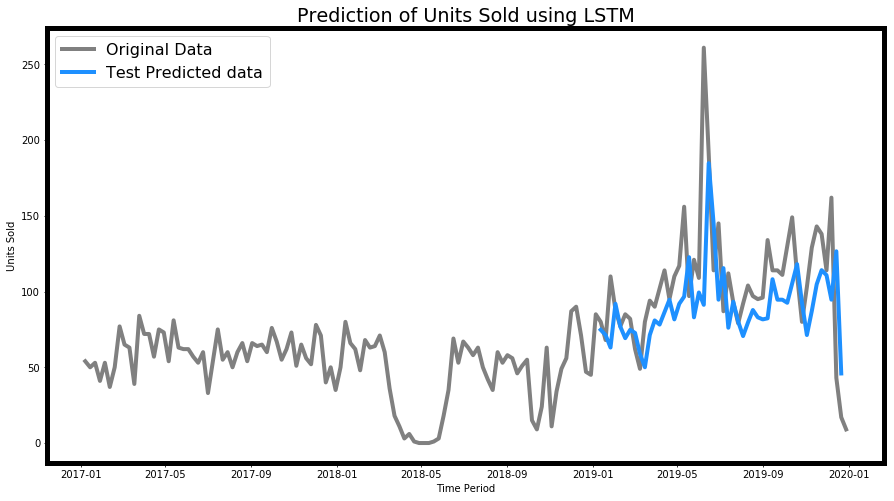

In [37]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(y_value)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict_inverted)+look_back, :] = trainPredict_inverted
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y_value)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict_inverted)+(look_back*2)+1:len(y_value)-1, :] = testPredict_inverted
# plot baseline and predictions
fig= plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(5)
plt.rcParams.update({'font.size': 16})
plt.plot(x, scaler.inverse_transform(y_value), label= "Original Data", color= "grey", linewidth=4)
#plt.plot(trainPredictPlot, label= "Train Predicted data")
plt.plot(x, testPredictPlot, label= "Test Predicted data", color= "Dodgerblue", linewidth= 4)
plt.title("Prediction of Units Sold using LSTM")
plt.xlabel("Time Period")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

In [78]:
lstm_pred=pd.DataFrame(testPredict_inverted[0])

In [82]:
new_list = [] #making new dataframe of predicted units sold value to save it as a csv file
for i in range(len(testPredict_inverted)):
    
    x = testPredict_inverted[i][0]
    new_list.append(x)

In [86]:
new_list= pd.DataFrame(np.array(new_list))

In [87]:
new_list

,0
0,74.750671
1,71.306503
2,63.042950
3,91.908394
4,76.816338
5,69.239784
6,74.750671
7,72.684280
8,58.918308
9,50.016060


In [77]:
testPredict_inverted

array([[ 74.75067 ],
       [ 71.3065  ],
       [ 63.04295 ],
       [ 91.908394],
       [ 76.81634 ],
       [ 69.239784],
       [ 74.75067 ],
       [ 72.68428 ],
       [ 58.91831 ],
       [ 50.01606 ],
       [ 71.3065  ],
       [ 80.944084],
       [ 78.19288 ],
       [ 86.43603 ],
       [ 94.63517 ],
       [ 81.63142 ],
       [ 91.908394],
       [ 96.67546 ],
       [122.681656],
       [ 83.00544 ],
       [ 99.38886 ],
       [ 91.22564 ],
       [184.7598  ],
       [144.86955 ],
       [ 94.63517 ],
       [115.46136 ],
       [ 76.127884],
       [ 93.272644],
       [ 80.25655 ],
       [ 70.617584],
       [ 79.56883 ],
       [ 87.80621 ],
       [ 83.00544 ],
       [ 81.63142 ],
       [ 82.31854 ],
       [108.14363 ],
       [ 94.63517 ],
       [ 94.63517 ],
       [ 92.59072 ],
       [105.461136],
       [118.09887 ],
       [ 92.59072 ],
       [ 71.3065  ],
       [ 87.121284],
       [104.7889  ],
       [114.13772 ],
       [110.81503 ],
       [ 94.6

In [89]:
new_list.to_csv('lstm_pred.csv')

# <font color = 'blue'>  **Clustering 1** </font>

In [62]:
df_cluster= df1[["WeekId","WeekEnding", "RetailerSku", "UnitsSold"]]

In [64]:
df_cluster1 = df_cluster.groupby(['RetailerSku']).size().reset_index(name='count').sort_values(by = ['count'], ascending = False)#groupby of units sold at sku level

In [66]:
df_active_cluster= df_cluster1[df_cluster1["count"]==161] #filtering active ASIN which is having values for total 161 weeks

#filtering active ASIN for 3 years
#merge with actual sales dataframe
df_new = pd.merge(df_cluster,df_active_cluster,on='RetailerSku',how='inner')

In [69]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10626 entries, 0 to 10625
Data columns (total 5 columns):
WeekId         10626 non-null int64
WeekEnding     10626 non-null datetime64[ns]
RetailerSku    10626 non-null object
UnitsSold      10626 non-null int64
count          10626 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 498.1+ KB


In [70]:
df_new["WeekId"]= df_new["WeekId"].astype(str)
df_active_2019 = df_new[df_new['WeekId'].apply(lambda x: x.startswith('2019'))]#filtering 2019 active ASIN

In [72]:
df_2019 = df_active_2019.groupby(['WeekId', "RetailerSku"], as_index= False)["UnitsSold"].sum() 

In [89]:
df_structured = df_2019.pivot_table('UnitsSold', ["RetailerSku"], 'WeekId') #transforming WeekIds into columns to see sales trend of each ASIN across weekends

In [150]:
from sklearn.cluster import KMeans #Kmeans clustering for active 2019 ASINs
km_x= df_structured.iloc[:, 1:].values

In [151]:
km_x

array([[ 0,  0,  0, ..., 55, 26,  2],
       [24, 26, 66, ..., 73, 91,  2],
       [17, 24, 19, ..., 20, 19,  2],
       ...,
       [15,  5,  1, ..., 13,  6,  2],
       [13,  8, 17, ...,  0,  0,  2],
       [31, 38, 34, ..., 67, 29,  2]], dtype=int64)

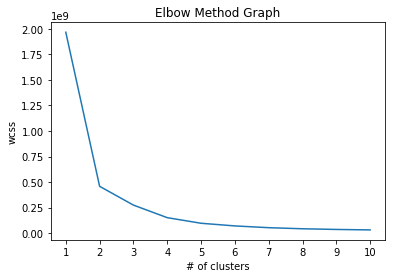

In [93]:
#plotting elbow graph
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(km_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xticks(np.arange(1,11,1))
plt.title("Elbow Method Graph")
plt.xlabel("# of clusters")
plt.ylabel("wcss")    
plt.show()

In [94]:
#applying k-means with number of cluster-3
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=0)
km_y_pred= kmeans.fit_predict(km_x)

In [95]:
km_y_pred

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
df_structured["Cluster"]= km_y_pred

In [83]:
from sklearn.decomposition import PCA #since there are 52 dimension, hence using PCA to visualize the graph in reduced dimension

In [84]:
reduced_dim = PCA(n_components=2).fit_transform(km_x)#fitting PCA with n components =2
result = pd.DataFrame(reduced_dim,columns=['pca1','pca2'])
result["Cluster"]= km_y_pred
result.head(5)

,pca1,pca2,Cluster
0,-2087.228488,-465.193173,2
1,-1971.942282,-409.980119,2
2,-2050.296129,-333.201082,2
3,-1893.824256,-300.653079,2
4,553.849586,273.657079,0


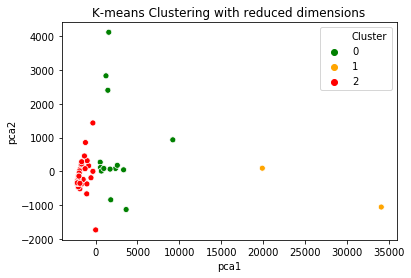

In [85]:
sns.scatterplot(x="pca1", y="pca2", hue=result["Cluster"], palette=['green',"orange", 'red'], data=result) #plotting clustering graph using PCA axis
plt.title('K-means Clustering with reduced dimensions')
plt.show()

In [152]:
scaler = MinMaxScaler(feature_range=(0, 1)) #feature scaling the data
km_x_scaled = scaler.fit_transform(km_x)

In [153]:
km_x_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.90111669e-03, 5.50031733e-03, 1.00000000e+00],
       [5.38116592e-03, 6.13062957e-03, 1.58197507e-02, ...,
        1.18142094e-02, 1.92511106e-02, 1.00000000e+00],
       [3.81165919e-03, 5.65904268e-03, 4.55417066e-03, ...,
        3.23676970e-03, 4.01946266e-03, 1.00000000e+00],
       ...,
       [3.36322870e-03, 1.17896722e-03, 2.39693193e-04, ...,
        2.10390031e-03, 1.26930400e-03, 1.00000000e+00],
       [2.91479821e-03, 1.88634756e-03, 4.07478428e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.95067265e-03, 8.96015091e-03, 8.14956855e-03, ...,
        1.08431785e-02, 6.13496933e-03, 1.00000000e+00]])

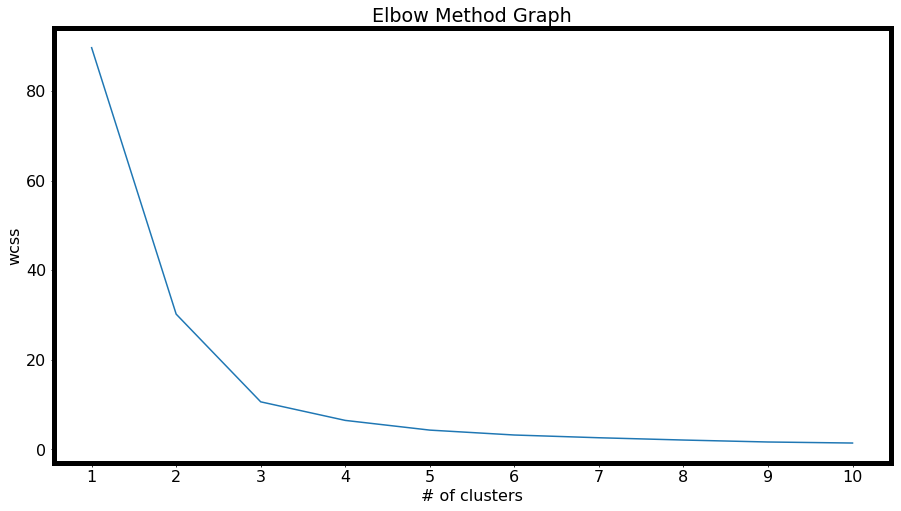

In [168]:
wcss=[]
for i in range(1,11): #plotting elbow graph for scaled data
    kmeans= KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(km_x_scaled)
    wcss.append(kmeans.inertia_)
fig= plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(5)
plt.rcParams.update({'font.size': 16})
plt.plot(range(1,11), wcss)
plt.xticks(np.arange(1,11,1))
plt.title("Elbow Method Graph")
plt.xlabel("# of clusters")
plt.ylabel("wcss")    
plt.show()

In [157]:
#applying k-means with number of cluster-3 
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=0)
km_y_pred_scaled= kmeans.fit_predict(km_x_scaled)

In [158]:
km_y_pred_scaled

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [159]:
reduced_dim = PCA(n_components=2).fit_transform(km_x_scaled)
result = pd.DataFrame(reduced_dim,columns=['pca1','pca2'])
result["Cluster"]= km_y_pred_scaled
result.head(5)

,pca1,pca2,Cluster
0,-0.487508,0.160318,1
1,-0.459223,0.162589,1
2,-0.470475,0.156263,1
3,-0.437871,0.159500,1
4,0.286444,-0.711785,0


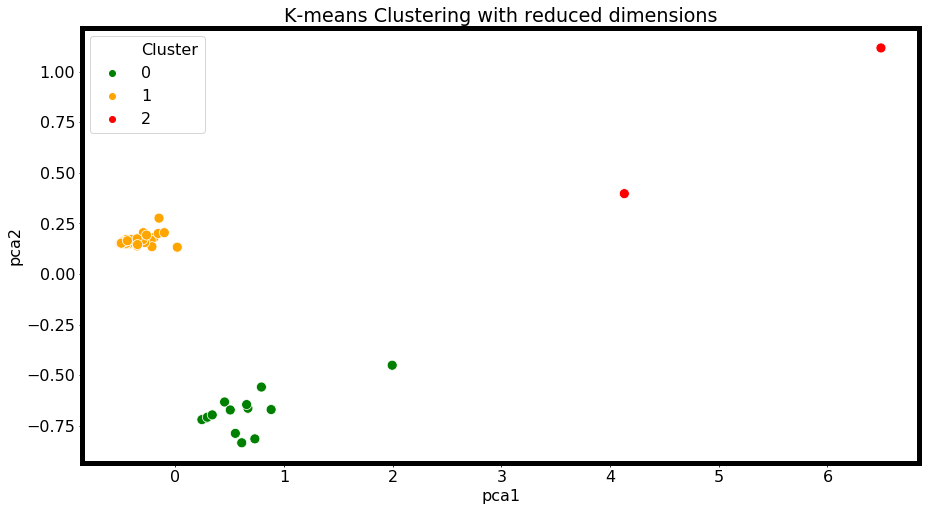

In [167]:
fig= plt.figure(figsize=(15,8)) #cluster graph of scaled data
ax = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(5)
plt.rcParams.update({'font.size': 16})
sns.scatterplot(x="pca1", y="pca2",s=100, hue=result["Cluster"], palette=['green',"orange", 'red'], data=result)
plt.title('K-means Clustering with reduced dimensions')
plt.show()

In [ ]:
df_structured["Cluster"]= km_y_pred_scaled #adding column for cluster mapping of each ASIN

# <font color = 'blue'>  **Clustering-2 (after adding category)** </font>

In [100]:
df_cluster_new= df1[["WeekId","WeekEnding", "RetailerSku", "UnitsSold", "Category"]]

aggr_cat= {"Category":"last"}
df_sku_cat = df_cluster_new.groupby(["RetailerSku"], as_index= False).agg(aggr_cat)

In [118]:
df_merge = pd.merge(df_structured,df_sku_cat,on='RetailerSku',how='inner')

df_merge= df_merge.drop(["Cluster"], axis=1)

In [121]:
category= pd.get_dummies(df_merge["Category"], drop_first= True)
df_merge.drop(["Category"], axis=1, inplace= True)

df_with_dummy= pd.concat([df_merge, category], axis=1)

In [125]:
from sklearn.cluster import KMeans
km_x= df_with_dummy.iloc[:, 1:].values

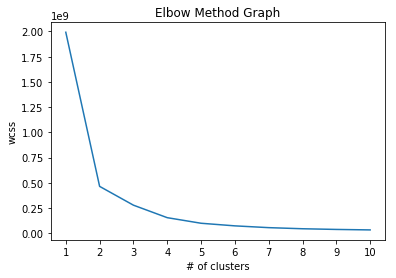

In [126]:
#plotting elbow graph
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(km_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xticks(np.arange(1,11,1))
plt.title("Elbow Method Graph")
plt.xlabel("# of clusters")
plt.ylabel("wcss")    
plt.show()

In [146]:
#applying k-means with number of cluster-2
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=0)
km_y_pred= kmeans.fit_predict(km_x)

In [147]:
df_with_dummy["Cluster"]= km_y_pred

In [148]:
reduced_dim = PCA(n_components=2).fit_transform(km_x)
result = pd.DataFrame(reduced_dim,columns=['pca1','pca2'])
result["Cluster"]= km_y_pred
result.head(5)

,pca1,pca2,Cluster
0,-2107.671689,-467.704030,2
1,-1992.086490,-412.858574,2
2,-2068.763383,-335.123025,2
3,-1911.248849,-302.932009,2
4,544.996456,264.277929,0


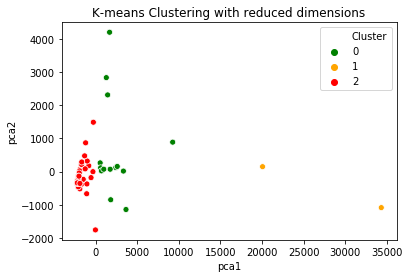

In [149]:
sns.scatterplot(x="pca1", y="pca2", hue=result["Cluster"], palette=['green',"orange","red"], data=result)
plt.title('K-means Clustering with reduced dimensions')
plt.show()